In [26]:
from model.model import *
from preprocess import *

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
session = 12

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...


In [51]:
train, test = train_test_split(dfs)

In [52]:
train.head()

,session,session_type,mouse_name,trial_number,trial_type,go_trial,stim_loc,ideal_resp,gocue,response_time,...,pres_difficulty,pres_acc,past_acc,past_latency,past_difficulty,past_trial_type,fut_acc,fut_latency,fut_difficulty,fut_trial_type
214,2,test,Cori,1,C,True,2,NaN,752.008542,1484.205944,...,1.00,1,0.0,484.365893,0.25,D,1.0,440.538210,0.75,B
215,2,test,Cori,2,B,True,1,1.0,1143.613039,1584.151249,...,0.75,1,1.0,732.197401,1.00,C,1.0,746.631911,1.00,C
216,2,test,Cori,3,C,True,2,NaN,704.007991,1450.639903,...,1.00,1,1.0,440.538210,0.75,B,1.0,362.944515,0.75,B
217,2,test,Cori,4,B,True,1,1.0,971.611064,1334.555579,...,0.75,1,1.0,746.631911,1.00,C,0.0,306.801607,NaN,F
218,2,test,Cori,5,F,False,0,0.0,860.809792,1167.611398,...,NaN,0,1.0,362.944515,0.75,B,0.0,1507.652028,NaN,F


In [27]:
dfs = preprocess(alldat)
train, test = train_test_split(dfs)
df= train
train.columns


hello_2


Index(['session', 'session_type', 'mouse_name', 'trial_number', 'trial_type',
       'go_trial', 'stim_loc', 'ideal_resp', 'gocue', 'response_time',
       'latency', 'mouse_resp', 'wheel_velocity', 'wheel_acceleration',
       'feedback_onset', 'feedback_type', 'contrast_left', 'contrast_right',
       'contrast_diff', 'pres_difficulty', 'pres_acc', 'past_acc',
       'past_latency', 'past_difficulty', 'past_trial_type', 'fut_acc',
       'fut_latency', 'fut_difficulty', 'fut_trial_type'],
      dtype='object')

In [43]:
print(df["latency"].head())
print(df["fut_latency"].head())
print(df["past_latency"].head())


214    732.197401
215    440.538210
216    746.631911
217    362.944515
218    306.801607
Name: latency, dtype: float64
214     440.538210
215     746.631911
216     362.944515
217     306.801607
218    1507.652028
Name: fut_latency, dtype: float64
214    484.365893
215    732.197401
216    440.538210
217    746.631911
218    362.944515
Name: past_latency, dtype: float64


In [29]:
dfs["fut_trial_type"]

0          A
1          E
2          F
3          D
4          F
        ... 
10045      E
10046      E
10047      E
10048      E
10049    nan
Name: fut_trial_type, Length: 10050, dtype: object

In [135]:
df = train

In [32]:
import seaborn as sns

def plots_2(df, var = "fut_latency", features = ["pres_acc", "fut_latency"], filter_name = None, filter_ = None, hue = None):
    df = df[df["trial_type"]!= "F"] #no go trials (present)
    df = df[df["fut_trial_type"]!= "F"] #no go trials (present)

    if filter_name is not None:
        df = df[df[filter_name] == filter_]
        
    print(set(df["fut_difficulty"]))
    print(df.head().trial_type)
    print(df.head().fut_trial_type)
    
    for feature in features:
        if df[feature].dtype in [float, int]:
            if len(list(set(df[feature].dropna()))) < 10:
                plt.figure()
                sns.violinplot(df[feature], df[var])  
                plt.xlabel(feature)
                plt.ylabel(var)
                plt.title("%s: %s Response Time"%(filter_name, filter_))
            else: 
                plt.figure()
                sns.scatterplot(feature, var, data = df, hue=hue, alpha= 0.7)
                plt.xlabel(feature)
                plt.ylabel(var)
                plt.title("%s: %s Response Time"%(filter_name, filter_))
                         

In [137]:
for i in range(39):
    print("session ", i)
    print(np.min(alldat[i]['gocue']))
    print(np.min(alldat[i]['response_time']))

session  0
0.48680763397413784
0.5843074453777604
session  1
0.4864054928859787
0.5682108526608545
session  2
0.48640761803847
0.5857100065359191
session  3
0.3973799848536146
0.5280655366015026
session  4
0.4005331095560223
0.5083060956027907
session  5
0.4003654706634734
0.4949078013951578
session  6
0.4002940636891026
0.5514852539473054
session  7
0.48880782308005166
0.5839892658963493
session  8
0.4904077633223096
0.5694611385691815
session  9
0.4892078351268765
0.5521847488997764
session  10
0.4884055919335992
0.5847157886171885
session  11
0.3968077446082816
0.47941449767444055
session  12
0.4000552538584543
0.5055177303122491
session  13
0.3982485672660232
0.5011834151572714
session  14
0.3976782365218696
0.4946784879016377
session  15
0.39777245598179434
0.504915826921831
session  16
0.39744640309695
0.5006253927650164
session  17
0.40292323620616344
0.4928565491806012
session  18
0.5960101592835372
0.7012967088068081
session  19
0.5952067798306615
0.7522238159684775
session  2

{0.75, 1.0, 0.25, 0.0, 0.5, nan}
214    C
215    B
216    C
220    B
224    A
Name: trial_type, dtype: object
214    B
215    C
216    B
220    A
224    A
Name: fut_trial_type, dtype: object


/Users/jordanlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


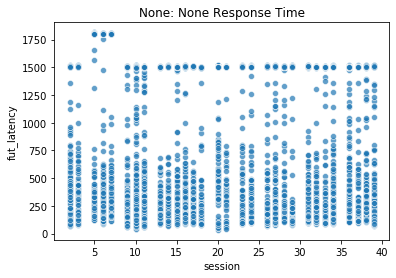

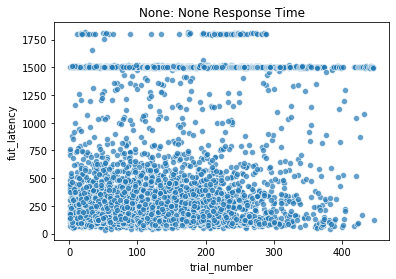

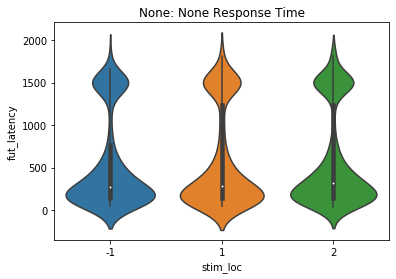

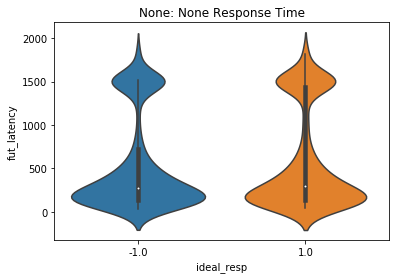

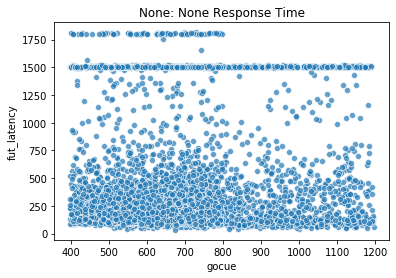

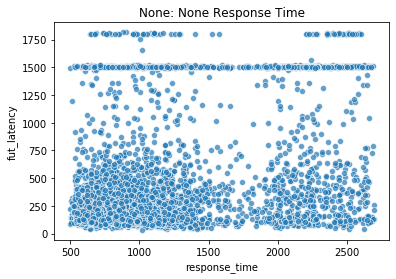

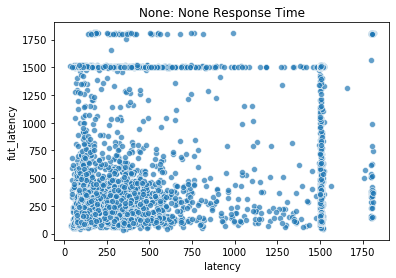

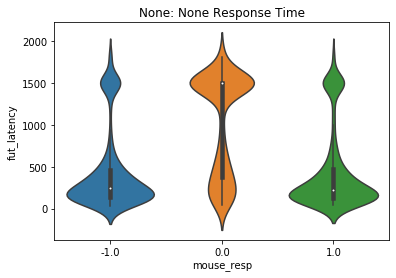

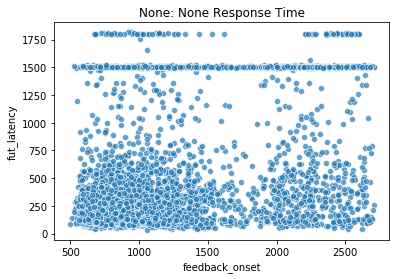

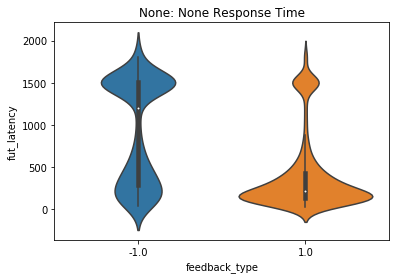

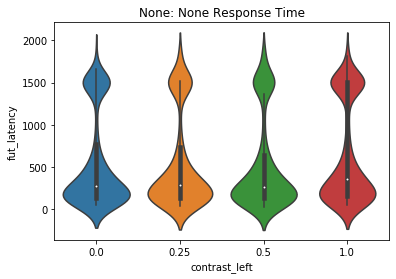

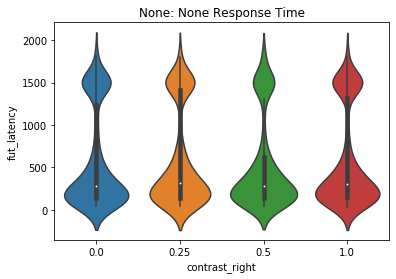

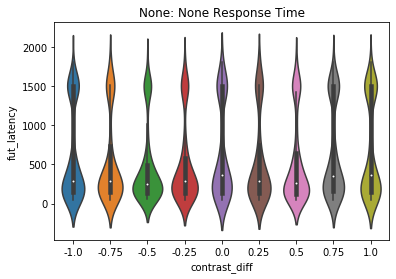

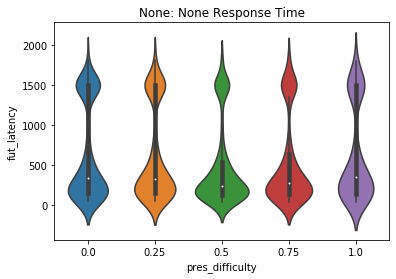

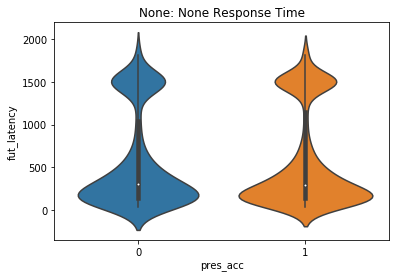

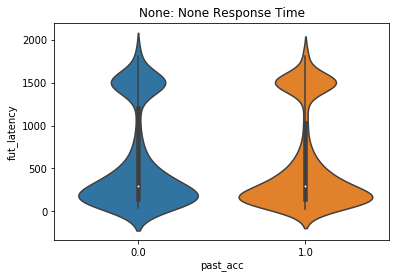

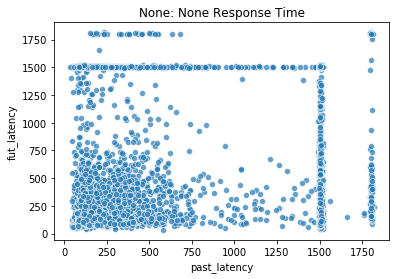

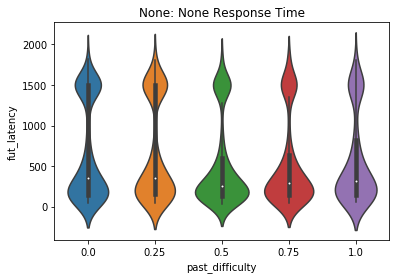

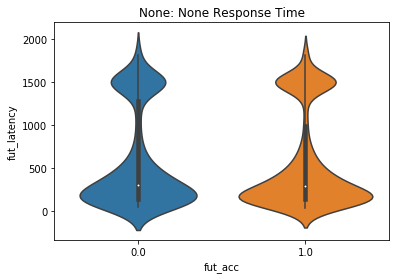

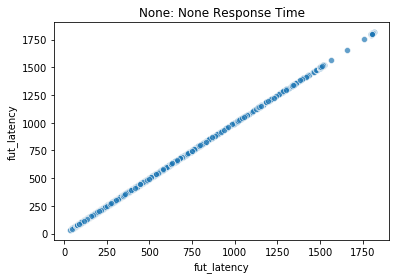

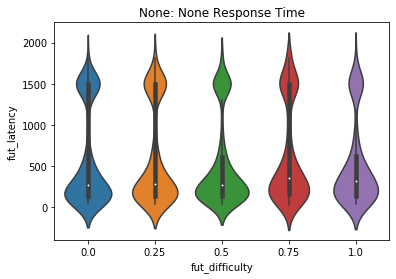

In [33]:
plots_2(df, features=df.columns)

{0.0}
220    B
226    C
235    A
243    B
267    D
Name: trial_type, dtype: object
220    A
226    A
235    A
243    A
267    A
Name: fut_trial_type, dtype: object
{0.25}
227    A
228    E
285    B
315    D
316    D
Name: trial_type, dtype: object
227    E
228    E
285    D
315    D
316    D
Name: fut_trial_type, dtype: object
{0.5}
224    A
231    C
236    A
237    A
238    B
Name: trial_type, dtype: object
224    A
231    B
236    A
237    B
238    A
Name: fut_trial_type, dtype: object
{0.75}
214    C
216    C
244    A
249    B
258    A
Name: trial_type, dtype: object
214    B
216    B
244    E
249    E
258    E
Name: fut_trial_type, dtype: object
{1.0}
215    B
225    A
229    E
230    C
245    E
Name: trial_type, dtype: object
215    C
225    C
229    C
230    C
245    C
Name: fut_trial_type, dtype: object


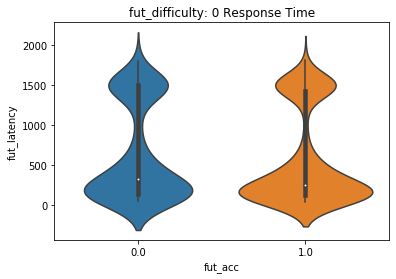

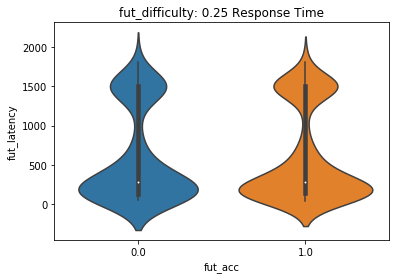

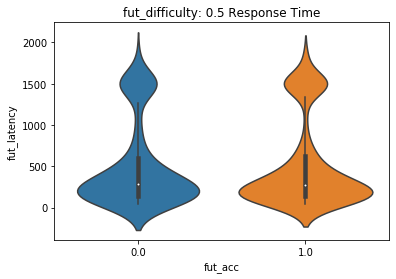

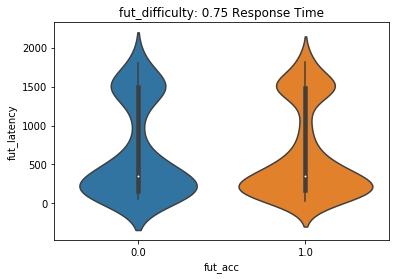

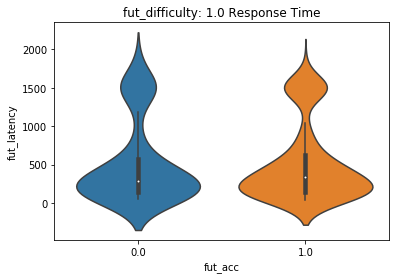

In [41]:
for i in [0, 0.25, 0.5, 0.75, 1.0]:
    plots_2(df, var = "fut_latency", features = ["fut_acc"], filter_name = "fut_difficulty", filter_= i)

{0.0}
220    B
226    C
235    A
243    B
267    D
Name: trial_type, dtype: object
220    A
226    A
235    A
243    A
267    A
Name: fut_trial_type, dtype: object
{0.25}
227    A
228    E
285    B
315    D
316    D
Name: trial_type, dtype: object
227    E
228    E
285    D
315    D
316    D
Name: fut_trial_type, dtype: object
{0.5}
224    A
231    C
236    A
237    A
238    B
Name: trial_type, dtype: object
224    A
231    B
236    A
237    B
238    A
Name: fut_trial_type, dtype: object
{0.75}
214    C
216    C
244    A
249    B
258    A
Name: trial_type, dtype: object
214    B
216    B
244    E
249    E
258    E
Name: fut_trial_type, dtype: object
{1.0}
215    B
225    A
229    E
230    C
245    E
Name: trial_type, dtype: object
215    C
225    C
229    C
230    C
245    C
Name: fut_trial_type, dtype: object


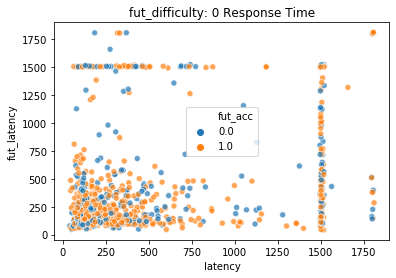

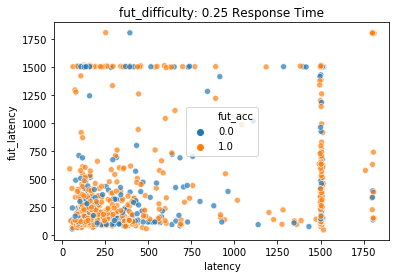

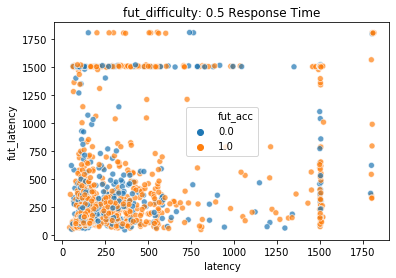

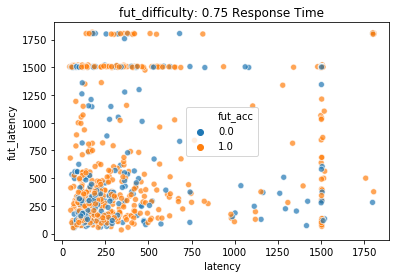

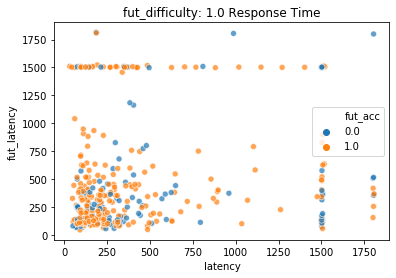

In [37]:
for i in [0, 0.25, 0.5, 0.75, 1.0]:
    plots_2(df, var = "fut_latency", features = ["latency"], filter_name = "fut_difficulty", filter_= i, hue= "fut_acc")

{0.75, 0.0, 0.25, 1.0, 0.5}
214    C
216    C
226    C
230    C
231    C
Name: trial_type, dtype: object
214    B
216    B
226    A
230    C
231    B
Name: fut_trial_type, dtype: object


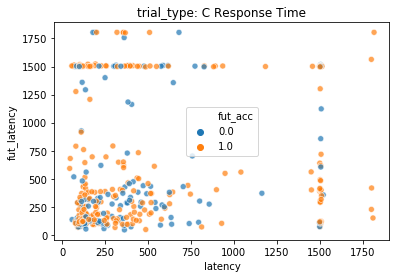

In [39]:
plots_2(df, var = "fut_latency", features = ["latency"], filter_name = "trial_type", filter_= "C", hue= "fut_acc")

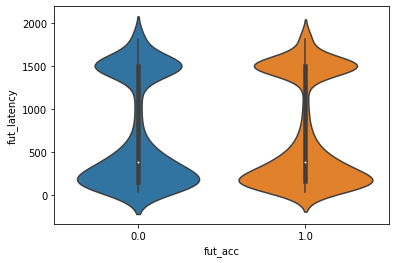

In [55]:
plt.figure()
sns.violinplot(x = "fut_acc", y= "fut_latency", data = df)

In [47]:
dfs["feedback_type"].head()

0    1.0
1    1.0
2    1.0
3    1.0
4   -1.0
Name: feedback_type, dtype: float64

In [48]:
dfs["pres_acc"].head()

0    1
1    1
2    1
3    1
4    0
Name: pres_acc, dtype: int64

In [53]:
print(alldat[1]["response_time"][:5] - alldat[1]['gocue'][:5])
print(df["latency"][:5])

[[0.7321974 ]
 [0.44053821]
 [0.74663191]
 [0.36294452]
 [0.30680161]]
214    732.197401
215    440.538210
216    746.631911
217    362.944515
218    306.801607
Name: latency, dtype: float64


In [13]:
df.columns

Index(['session', 'mouse_name', 'trial_type', 'contrast_right',
       'contrast_left', 'stim_loc', 'winning_stim', 'mouse_resp', 'ideal_resp',
       'future_acc', 'pres_acc', 'contrast_diff', 'abs_contrast_diff',
       'pres_difficulty', 'future_difficulty', 'gocue_onset', 'resp_time',
       'future_resp_time', 'latency', 'feedback_onset', 'feedback_type',
       'prev_feedback'],
      dtype='object')

KeyboardInterrupt: 

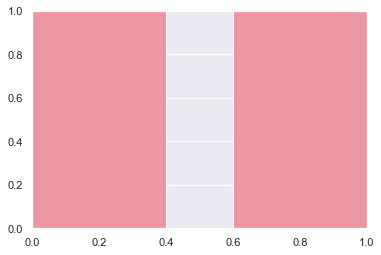

In [15]:
sns.set()
plt.figure()
sns.countplot(x = "resp_time", data = df)

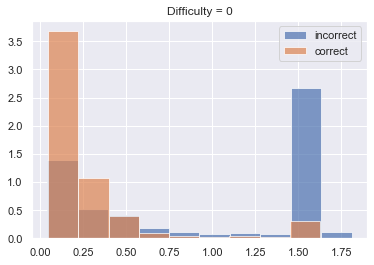

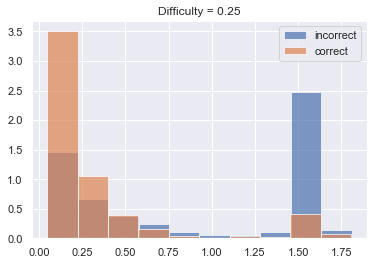

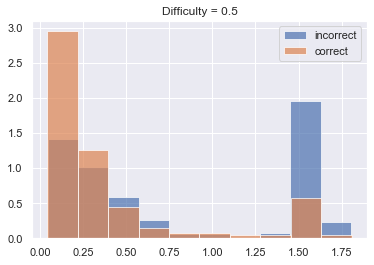

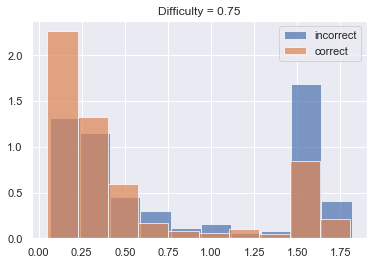

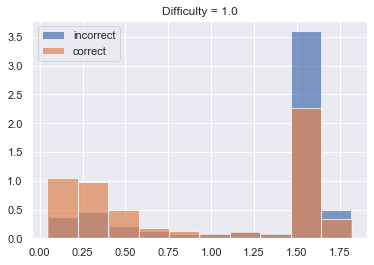

In [80]:
for i in [0, 0.25, 0.5, 0.75, 1.0]:
    plt.figure()

    pdf = df[df["future_difficulty"] == i]
    plt.hist(x = "future_latency", data = pdf[pdf["pres_acc"]==0], density = True, alpha = 0.7, label = "incorrect")
    plt.hist(x = "future_latency", data = pdf[pdf["pres_acc"]==1], density = True, alpha = 0.7, label = "correct")
    plt.legend()
    
    plt.title("Difficulty = %s"%i)

In [27]:
df["resp_time"].head()

0    1.150204
1    1.399503
2    0.949291
3    2.266802
4    0.816776
Name: resp_time, dtype: float64

In [28]:
df["resp_time_prev"].head()

0         NaN
1    1.150204
2    1.399503
3    0.949291
4    2.266802
Name: resp_time_prev, dtype: float64

In [52]:
df.columns

Index(['session', 'mouse_name', 'trial_type', 'contrast_right',
       'contrast_left', 'stim_loc', 'winning_stim', 'mouse_resp', 'ideal_resp',
       'prev_acc', 'pres_acc', 'contrast_diff', 'abs_contrast_diff',
       'pres_difficulty', 'future_difficulty', 'gocue_onset', 'resp_time',
       'future_resp_time', 'latency', 'feedback_onset', 'feedback_type',
       'prev_feedback'],
      dtype='object')